# Проверика работы центральной предельной теоремы для F-распределения

Если случайные величины $U \sim X_m^2$ и $V \sim X_n^2$ - независимы, то случайная величина

$$
F_{\frac{m}{n}} = \frac{ \frac{1}{m}U }{ \frac{1}{n}V }
$$
имеет распределение Фишера.

Дальше я рассматриваю, ситуацию когда степени свободы числителя и знаменателя равы.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# импортируем, что понадобится дальше
from __future__ import division

from collections import defaultdict

import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

### Часть 1

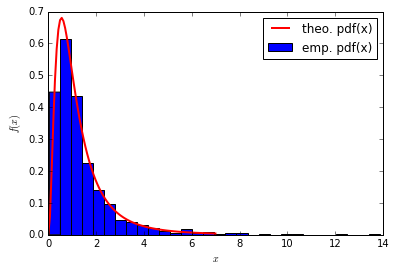

In [3]:
# Задаём степени свободы
m = 7
n = 7

# зададим случайную величину распределённую по распределению Фишера
f_rv = stats.f(m, n, loc=0, scale=1)

# сгенерируем 100 значений
data = f_rv.rvs(size=1000)

# шкала для pdf с шагом 100, что бы было гладенько, ppf что бы
# не двигать шкалу вручную при изменении степеней свободы
x = np.linspace(0.001, f_rv.ppf(0.99), 100, 'b')

# Рисуем нормированную гистограмму 
plt.hist(data, bins=30, normed=True, label='emp. pdf(x)')

# и теоретическую ф-ю плотности поверх неё
plt.plot(x, f_rv.pdf(x), 'r', lw=2, label='theo. pdf(x)')

# подписываем оси
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='best')

### Часть 2

In [4]:
# для значений ni (5, 10, 50) сгенерируйте cnt (1000) выборок объёма ni
ni = (5, 10, 50)
cnt = 100

res = defaultdict(lambda: [])

for i in ni:
    for j in range(cnt):
        data = f_rv.rvs(size=i)
        # получаем выборочное среднее
        # расчитанное как sum(x)/n и
        # добавлям с писку для соответствующей
        # группы выборок объёма i
        res[i].append(data.mean())

#### Гистограмма выборочных средних для ni=5

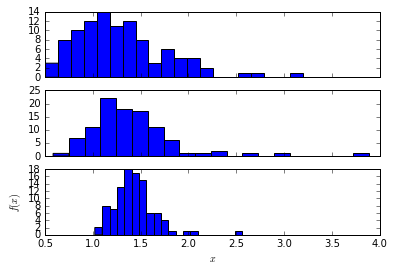

In [5]:
f, axi = plt.subplots(len(ni), sharex=True)

for i, ax in zip(ni, axi):
    ax.hist(res[i], bins=20)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

#### Математическое ожидание и дисперсия F-распределения
Они выражаются формулами:

$$
E(F_{\frac{m}{n>2}})=\frac{n}{n-2}
$$
для мат. ожидания и
$$
D(F_{ \frac{m}{n>4} })=\frac{2n^2(m+n-2)}{m(n-2)^2(n-4)}
$$
дисперсии.

In [6]:
ex = n/(n-2)
df = (2 * n ** 2 * (m + n - 2))/(m * (n-2)**2 * (n-4))

Теперь проверим, что я умею считать

In [7]:
print 'E(X) %0.2f == %0.2f' % (ex, f_rv.mean())
print 'D(X) %0.2f == %0.2f' % (df, f_rv.std() ** 2)

E(X) 1.40 == 1.40
D(X) 2.24 == 2.24


так же это можно проконтролировать по первому графику.

Так как $\overline{X_i} \approx \sim N(\mu, \frac{\sigma}{\sqrt(n)})$, то по известным математическому ожиданию и дисперсии исходного распределения получаем слудующие параметры нормальных распределений для средних:

$$
E(\overline{X_5}) = E(X) = 1.40; D(\overline{X_5}) = \frac{D(X)}{5} = 0.448 \\
E(\overline{X_{10}}) = E(X) = 1.40; D(\overline{X_10}) = \frac{D(X)}{10} = 0.224 \\
E(\overline{X_{50}}) = E(X) = 1.40; D(\overline{X_50}) = \frac{D(X)}{50} = 0.048
$$

или тоже самое на питон:

In [8]:
sexi = [f_rv.mean(), f_rv.mean(), f_rv.mean()]
sdxi = [f_rv.std()**2/5, f_rv.std()**2/10, f_rv.std()**2/50]

Строим гистограммы средних рисуем плотности нормальных распределений

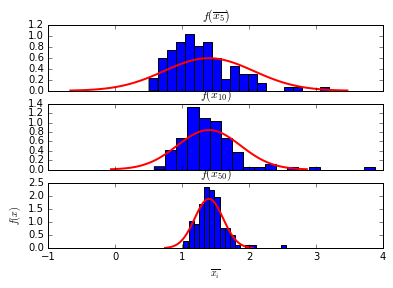

In [9]:
f, axi = plt.subplots(len(ni), sharex=True)

for i, ax, exi, dxi in zip(ni, axi, sexi, sdxi):
    ax.hist(res[i], bins=20, normed=True)

    # рисуем плотность нормального распределения
    norm_rv = stats.norm(loc=exi, scale=sqrt(dxi))
    
    x = np.linspace(norm_rv.ppf(0.001), norm_rv.ppf(0.999), 100)
    ax.plot(x, norm_rv.pdf(x), 'r', lw=2)
    ax.set_title('$f(\overline{x_{%d}})$' % i)

plt.ylabel('$f(x)$')
plt.xlabel('$\overline{x_i}$')

### Выводы
Несмотря на то, что ф-я плотности распределения Фишера со степенями свободы m=n=7 явно скошена, с ростом объёма выборки уже получается неплохо аппроксимировать плотность стандартных выборочных.
А учитыва, что если степень знаменателя $n \rightarrow \infty$, то распределение Фишера асимптотически нормально, то при достаточно больших значениях результат будет ещё лучьше.